In [1]:
from __future__ import division
import os
import time
import glob
import datetime
import argparse
import numpy as np

import cv2
from PIL import Image
import torch
import torch.optim as optim
from torch.optim import lr_scheduler
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data import Dataset

from arch_unet import UNet

In [48]:
network = UNet(in_nc=3,
               out_nc=3,
               n_feature=48)
#network = torch.nn.DataParallel(network)
network = network.cuda()
network.load_state_dict(torch.load('./pretrained_model/model_poisson30_b4e100r02.pth'), strict=False)

<All keys matched successfully>

torch.Size([1, 480, 512, 3])


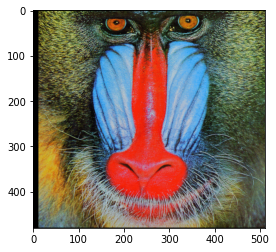

In [49]:
ima = np.array(Image.open('./validation/Set14/baboon.png'))
H, W, _ = ima.shape
H_ = (H+31)//32 * 32
W_ = (W+31)//32 * 32
ima = np.pad(ima, [[H_-H, 0], [W_-W, 0], [0, 0]])

ima = torch.tensor(ima).cuda()[None,...]/255.
from matplotlib import pyplot as plt
plt.imshow(ima[0].cpu())
print(ima.shape)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


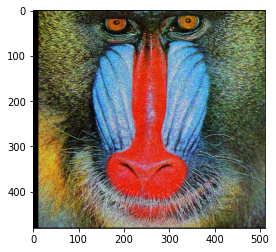

In [52]:
ima_noisy = ima + torch.normal(0.0, 25./255., ima.shape).cuda()
ima_noisy = torch.poisson(30 * ima) / 30
plt.imshow(ima_noisy[0].cpu())

In [53]:
ima_noisy = ima_noisy.permute(0, 3, 1, 2)
denoised = network(ima_noisy)
denoised = denoised.permute(0, 2, 3, 1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


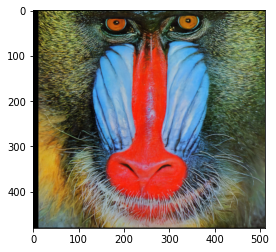

In [54]:
plt.imshow(denoised[0].cpu().detach())

In [59]:
x = np.array(ima.cpu())[:,:,:,0]
x.shape
np.repeat(x, 3, 0).shape

(3, 480, 512)